<p>
<img src="../imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">

# **NOTEBOOK 8**
---

# **Estrategias de clasificación**

## **Aprendizaje supervisado en clasificación de texto**

### **Clasificación mediante regresión logística**

La regresión logística es un método estadístico utilizado para modelar la relación entre una variable dependiente binaria y una o más variables independientes. 

1. **Modelo**:
   - La regresión logística modela la probabilidad $P(Y=1)$ de que la variable dependiente $Y$ sea 1 (generalmente representando la "clase positiva" en clasificación).
   - Se utiliza la función logística (o función sigmoide) $ \sigma(z) = \frac{1}{1 + e^{-z}} $ para transformar cualquier valor en el rango (0, 1), siendo $z$ la combinación lineal de variables independientes, es decir, $ z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots $.

2. **Estimación de parámetros**:
   - Los coeficientes $\beta$ se estiman utilizando el método de máxima verosimilitud. La idea es encontrar los valores de $\beta$ que maximizan la probabilidad (verosimilitud) de observar la muestra dada. Esto se puede hacer usando algoritmos de optimización como el método del gradiente, el método de Newton-Raphson, entre otros.

3. **Predicción**:
   - Una vez entrenado el modelo y estimados los coeficientes, se puede predecir la probabilidad $P(Y=1)$ para nuevos datos.
   - Para tomar una decisión de clasificación, se establece un umbral (comúnmente 0.5). Si $P(Y=1)$ es mayor que el umbral, se clasifica como 1, de lo contrario, se clasifica como 0.

### **Ejemplo de clasificación con regresión logística**

Supongamos que tenemos unos estudiantes y queremos predecir si van a aprobar o suspender un examen en función de las horas de estudio. La variable dependiente $Y$ es binaria (1 si aprueba, 0 si suspende) y la variable independiente $X$ es el número de horas de estudio.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creamos un conjunto de datos sencillo
data = {
    'Hours_Studied': [1.1, 1.9, 3.3, 4.1, 4.3, 6, 7.9, 10.1],  # Horas estudiadas
    'Passed': [0, 0, 0, 1, 0, 1, 1, 1]  # Aprobó (1) o no (0)
}

'''
data = {
    'Hours_Studied': [1.1, 1.9, 3.3, 4.1, 4.3, 6, 7.9, 10.1],  # Horas estudiadas
    'Passed': [0, 0, 0, 0, 1, 1, 1, 1]  # Aprobó (1) o no (0)
}
'''

df = pd.DataFrame(data)

# Separamos los datos en características (X) y etiqueta (y)
X = df[['Hours_Studied']]  # Características (necesita ser bidimensional para sklearn)
y = df['Passed']           # Etiqueta

# Creamos y entrenamos el modelo de regresión logística
model = LogisticRegression()
# model = LogisticRegression(max_iter=5000, C=100)  
model.fit(X, y)

# Realizamos las predicciones sobre el mismo conjunto de datos
predictions = model.predict(X)

# Calculamos la precisión
accuracy = accuracy_score(y, predictions)

# Mostramos los coeficientes y la precisión
coef = model.coef_
intercept = model.intercept_
accuracy, coef, intercept


(0.875, array([[0.94328925]]), array([-4.22682999]))

Y si ahora hacemos predcciones para unas horas de estudio de 2, 4, 6 y 8 horas, ¿qué resultados obtendríamos?

In [2]:
X_new = pd.DataFrame([[2], [4.3], [6]], columns=['Hours_Studied'])
predictions = model.predict(X_new)
predictions

array([0, 0, 1])

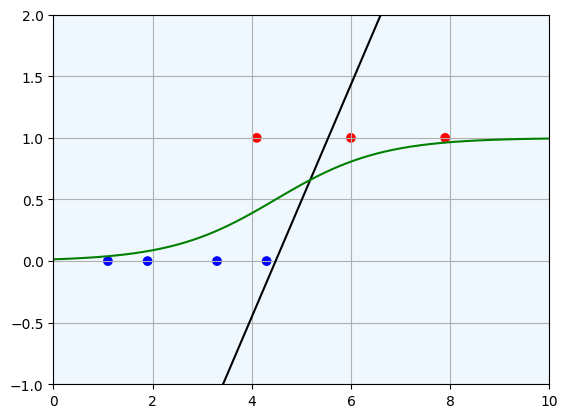

In [3]:
# Plot the decision boundary
import matplotlib.pyplot as plt

# Plot the data points with colors depending on the label
plt.scatter(X, y, c=y, cmap='bwr')

plt.grid(True)
plt.gca().set_facecolor('aliceblue')

# Plot the decision boundary
x_values = np.array([0, 10])
y_values = (coef * x_values + intercept)
plt.plot(x_values, y_values[0], color='black')

# Plot the logistic function
x_values = np.linspace(0, 10, 100)
y_values = 1 / (1 + np.exp(-(coef * x_values + intercept)))
plt.plot(x_values, y_values[0], color='green')

plt.xlim(0, 10)
plt.ylim(-1, 2)

# Show the plot
plt.show()


### **Ejemplo de clasificación de textos con regresión logística**

In [7]:
# Dataset de ejemplo
documents = [
    "La película fue emocionante y llena de acción.",
    "Ese libro tiene una trama intrigante.",
    "Los actores hicieron un trabajo excelente.",
    "El autor describe paisajes con gran detalle.",
    "El cine de autor siempre me ha fascinado.",
    "La novela estaba llena de giros inesperados.",
    "El guion de esa película fue escrito por un famoso novelista.",
    "Los personajes del libro eran muy realistas.",
    "Esa película está basada en un libro aclamado.",
    "El libro estaba basado en emocionantes paisajes.",
    "El guion fue aclamado por su trama intrigante.",
    "El cine muestra películas emocionantes de acción."
]

labels = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]  # 1: Positivo, 0: Negativo


Vamos a realizar la tokenización y conteo de palabras para construir la representación vectorial de los documentos. Para ello, vamos a utilizar la clase `CountVectorizer` de `scikit-learn`. Además, nos permite realizar el filtrado de palabras vacías (stop words).

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))
X = vectorizer.fit_transform(documents)

La matriz que almacena las frecuencias de aparición de las palabras contiene muchos ceros, debido a que la mayoría de las palabras no aparecen en un documento dado. Por lo tanto, la matriz es muy dispersa. Para reducir la cantidad de ceros, scikit-learn utiliza una matriz dispersa para almacenar la matriz de frecuencia de términos. Una matriz dispersa es una matriz que tiene muy pocos valores distintos de cero. Básicamente, lo que hace es almacenar solo los valores distintos de cero. Esto reduce el uso de memoria y acelera los cálculos.

Si quisiéramos ver la matriz podríamos hacer:

In [9]:
print(X.toarray())

[[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]]


Y solo los valores distintos de cero:

In [10]:
print(X)

  (0, 27)	1
  (0, 9)	1
  (0, 22)	1
  (0, 0)	1
  (1, 21)	1
  (1, 33)	1
  (1, 20)	1
  (2, 2)	1
  (2, 18)	1
  (2, 32)	1
  (2, 12)	1
  (3, 3)	1
  (3, 7)	1
  (3, 26)	1
  (3, 16)	1
  (3, 8)	1
  (4, 3)	1
  (4, 6)	1
  (4, 31)	1
  (4, 14)	1
  (5, 22)	1
  (5, 24)	1
  (5, 15)	1
  (5, 19)	1
  (6, 27)	1
  (6, 17)	1
  (6, 11)	1
  (6, 13)	1
  (6, 25)	1
  (7, 21)	1
  (7, 29)	1
  (7, 30)	1
  (8, 27)	1
  (8, 21)	1
  (8, 4)	1
  (8, 1)	1
  (9, 21)	1
  (9, 26)	1
  (9, 5)	1
  (9, 10)	1
  (10, 33)	1
  (10, 20)	1
  (10, 17)	1
  (10, 1)	1
  (11, 0)	1
  (11, 6)	1
  (11, 10)	1
  (11, 23)	1
  (11, 28)	1


Si quisiéramos ver el vocabulario que se ha generado, podemos hacerlo así:

In [11]:
vocabulario = vectorizer.vocabulary_
print(vocabulario)
print("--------------------")
print(vectorizer.get_feature_names_out())

{'película': 27, 'emocionante': 9, 'llena': 22, 'acción': 0, 'libro': 21, 'trama': 33, 'intrigante': 20, 'actores': 2, 'hicieron': 18, 'trabajo': 32, 'excelente': 12, 'autor': 3, 'describe': 7, 'paisajes': 26, 'gran': 16, 'detalle': 8, 'cine': 6, 'siempre': 31, 'fascinado': 14, 'novela': 24, 'giros': 15, 'inesperados': 19, 'guion': 17, 'escrito': 11, 'famoso': 13, 'novelista': 25, 'personajes': 29, 'realistas': 30, 'basada': 4, 'aclamado': 1, 'basado': 5, 'emocionantes': 10, 'muestra': 23, 'películas': 28}
--------------------
['acción' 'aclamado' 'actores' 'autor' 'basada' 'basado' 'cine' 'describe'
 'detalle' 'emocionante' 'emocionantes' 'escrito' 'excelente' 'famoso'
 'fascinado' 'giros' 'gran' 'guion' 'hicieron' 'inesperados' 'intrigante'
 'libro' 'llena' 'muestra' 'novela' 'novelista' 'paisajes' 'película'
 'películas' 'personajes' 'realistas' 'siempre' 'trabajo' 'trama']


Vemos en el siguiente código las palabas que hay en cada documento y su frecuencia.

In [422]:
from tabulate import tabulate

vocabulario = vectorizer.get_feature_names_out()

table = []

for i in range(X.shape[0]):
    fila = X.getrow(i)
    palabras_indices = fila.indices
    frecuencias = fila.data

    for idx, freq in zip(palabras_indices, frecuencias):
        table.append([i, vocabulario[idx], freq])

print(tabulate(table, headers=['Documento', 'Palabra', 'Frecuencia']))

  Documento  Palabra         Frecuencia
-----------  ------------  ------------
          0  película                 1
          0  emocionante              1
          0  llena                    1
          0  acción                   1
          1  libro                    1
          1  trama                    1
          1  intrigante               1
          2  actores                  1
          2  hicieron                 1
          2  trabajo                  1
          2  excelente                1
          3  autor                    1
          3  describe                 1
          3  paisajes                 1
          3  gran                     1
          3  detalle                  1
          4  autor                    1
          4  cine                     1
          4  siempre                  1
          4  fascinado                1
          5  llena                    1
          5  novela                   1
          5  giros                    1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

Entrenamos del modelo de regresión logística con los datos de entrenamiento.

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Comprobamos la exactitud del modelo con el conjunto de test.

In [15]:
from sklearn.metrics import accuracy_score

predicciones = clf.predict(X_test)
predicciones_proba = clf.predict_proba(X_test)

print(f"Predicciones: {predicciones}")
print("Probabilidades de las predicciones:") 
print(predicciones_proba)
print(f"Etiquetas reales: {y_test}")

exactitud = accuracy_score(y_test, predicciones)
print(f"Exactitud del modelo: {exactitud * 100:.2f}%")

Predicciones: [0 1 0]
Probabilidades de las predicciones:
[[0.50582455 0.49417545]
 [0.43805942 0.56194058]
 [0.63766643 0.36233357]]
Etiquetas reales: [0, 1, 0]
Exactitud del modelo: 100.00%


## **Regresión lineal en Pytorch**

In [426]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(666)

# Definición del modelo
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [427]:
# Suponiendo X_train y y_train son tus datos de entrenamiento
X_train_tensor = torch.tensor(X_train.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Parámetros
input_dim = X_train.toarray().shape[1]
learning_rate = 0.1
epochs = 100

# Modelo, función de pérdida y optimizador
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
# criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Entrenamiento
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Imprimir la pérdida cada 10 épocas
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.5634
Epoch [20/100], Loss: 0.4874
Epoch [30/100], Loss: 0.4272
Epoch [40/100], Loss: 0.3787
Epoch [50/100], Loss: 0.3390
Epoch [60/100], Loss: 0.3061
Epoch [70/100], Loss: 0.2785
Epoch [80/100], Loss: 0.2550
Epoch [90/100], Loss: 0.2349
Epoch [100/100], Loss: 0.2174


In [428]:
# Suponiendo X_test y y_test son tus datos de prueba
X_test_tensor = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

print("Labels: ", y_test_tensor)
# Evaluar el modelo
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    print("Predicted: ", test_outputs.squeeze())
    predicted = test_outputs.round()  # Clasifica como 1 si la salida > 0.5, de lo contrario 0
    accuracy = (predicted.squeeze() == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Labels:  tensor([0., 1., 0.])
Predicted:  tensor([0.4965, 0.5640, 0.2773])
Accuracy: 100.00%


In [10]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from sklearn.linear_model import LogisticRegression

# Ejemplo de regresión logística con visualización en 3D

# Datos de ejemplo, observaciones con dos características
data = {
    "x1": [5, 7, 8, 6, 5, 3 , 4, 2, 1, 3],
    "x2": [5, 6, 7, 8, 5, 3, 2, 1, 4, 2],
    "y": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Regresión logística
model = LogisticRegression()
X = df[["x1", "x2"]]
y = df["y"]
model.fit(X, y)

# Visualización en 3D de los datos y la frontera de decisión
fig = px.scatter_3d(df, x='x1', y='x2', z='y', color='y', title='Regresión Logística en 3D', width=800, height=600)
import numpy as np
xx, yy = np.meshgrid(range(-5, 15), range(-5, 15))
zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
zz = zz.reshape(xx.shape)
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, colorscale='Viridis', opacity=0.5))
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

